<a href="https://colab.research.google.com/github/kyanite153/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

迷路の縦の長さを入力：15
迷路の横の長さを入力：15

緑の丸がスタート地点
白の線は壁
迷路の外側がゴール


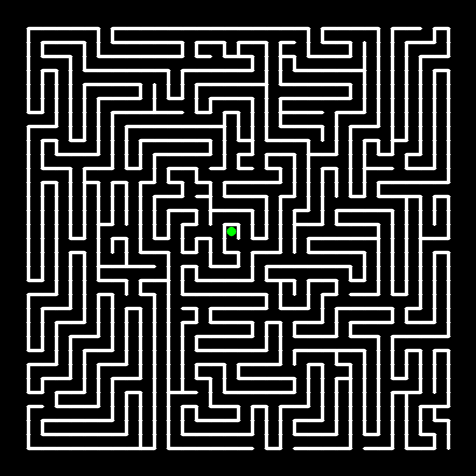

In [75]:
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow

while True:
  h = int(input('迷路の縦の長さを入力：'))
  if h >= 1:
    h = 2 * h + 4
    break
  else:
    print('長さは1以上にしてください')
while True:
  w = int(input('迷路の横の長さを入力：'))
  if w >= 1:
    w = 2 * w + 4
    break
  else:
    print('長さは1以上にしてください')

a = 14

h *= a
w *= a

color = (255,255,255)

p = np.array([w//2, h//2])

img = np.full((h, w, 3), 0, np.uint8)

move_list = np.array([[0,a],[a,0],[0,-a],[-a,0]])
direction = 1
mode = 1
count = 0
max_count = random.randint(0,7)
log = {(p[0],p[1]):direction}
back = -1
going = True

cv2.circle(img, (p[0]-a//2, p[1]-a//2), a//3, color=(0,255,0), thickness=-1,lineType=16)

print()
print('緑の丸がスタート地点')
print('白の線は壁')
print('迷路の外側がゴール')

while going==True:
  for i, x in enumerate([mode, 0, -mode]):
    new_direction = (direction + x) % 4
    move = move_list[new_direction]
    new_p = p + move
    if ((new_p[0],new_p[1]) in list(log.keys())) or (not ((a*2 <= new_p[0] <= w-a*2) and (a*2 <= new_p[1] <= h-a*2))):
      if i == 2:
        p = np.array(list(log.keys())[back])
        back -= 1
        if -back == len(log):
          going = False
        break
      else:
        continue
    cv2.line(img, p, p+move, color=color, thickness=2, lineType=16)
    p = new_p
    direction = new_direction
    log[(p[0],p[1])] = direction
    back = -1
    count += 1
    if count >= max_count:
      mode *= -1
      count = 0
      max_count = abs(max_count-int(len(log)**0.5))+random.randint(0,5)
    break

cv2_imshow(img)
